In [2]:
import pickle
import math
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, variance, stdev

In [3]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

In [4]:
pat = re.compile(r"\s+")
f = open("/home/andrea/pythiaEvents/Pythia8Results.dat", 'r')

In [5]:
g = list(zip(*[ pat.sub(" ",x.strip()).split() for x in f]))

In [6]:
npart = np.array([ int(x) for x in g[0]])
sph = np.array([ float(x) for x in g[1]]) #thrust calculated using sphericity as seed axis
thr = np.array([ float(x) for x in g[2]])
niter = np.array([ int(x) for x in g[3]])

In [7]:
pat2 = re.compile(r"\s+")
fd = open("/home/andrea/pythiaEvents/DWaveResults.dat", 'r')

In [8]:
g2 = list(zip(*[ pat2.sub(" ",x.strip()).split() for x in fd]))

In [9]:
dw = np.array([ float(x) for x in g2[0]])
sa = np.array([ float(x) for x in g2[1]])
rev = np.array([ float(x) for x in g2[2]])

In [10]:
pat3 = re.compile(r"\s+")
fd2 = open("/home/andrea/pythiaEvents/DWaveSeedResults.dat", 'r')

In [11]:
g3 = list(zip(*[ pat3.sub(" ",x.strip()).split() for x in fd2]))
dw2 = np.array([ float(x) for x in g3[0]])

In [19]:
for i in range(len(sa)):
    if(truncate(sa[i],4)>thr[i]):
        #print(truncate(sa[i],4), thr[i], npart[i])
        sa[i] = thr[i]
    if(truncate(sph[i],4) > thr[i]):
        sph[i] = thr[i]
    if(truncate(dw2[i],4) >thr[i]):
        dw2[i] = thr[i]
    if(truncate(dw[i],4) >thr[i]):
        dw[i] = thr[i]
    #if(diff > 1.0):
    #    print(npart[i],i, diff)

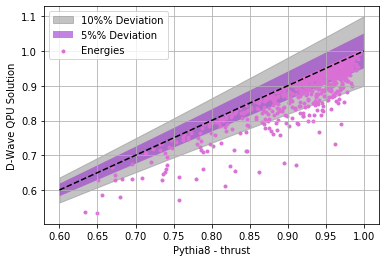

In [24]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, alpha=0.5, edgecolor='#888888', facecolor='#888888', label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='darkorchid', alpha=0.6,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--')
ax.scatter(thr, dw, color='orchid', marker = '.', label='Energies')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('D-Wave QPU Solution')
ax.legend(loc='upper left')

plt.savefig('plots/DWave1k.png')
plt.show()


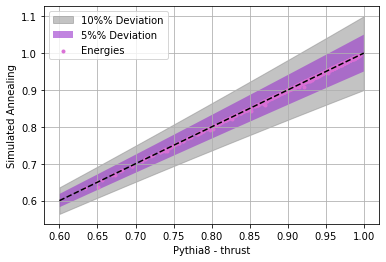

In [25]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, alpha=0.5, edgecolor='#888888', facecolor='#888888', label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='darkorchid', alpha=0.6,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--')
ax.scatter(thr, sa, color='orchid', marker = '.', label='Energies')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('Simulated Annealing')
ax.legend(loc='upper left')

plt.savefig('plots/SA.png')
plt.show()


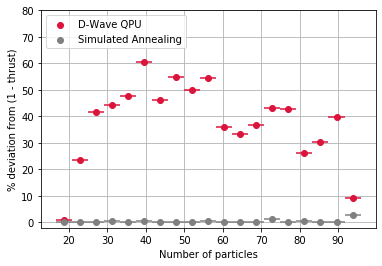

In [14]:
from scipy.stats import binned_statistic

diff_sa = []
diff_dw = []
nbins = 18

for i in range(len(dw)):
    if(truncate(sa[i],6)>thr[i]):
        diff_sa.append(100.*((1.0 - thr[i]) - (1.0 - truncate(sa[i],6)))/ (1.0 - thr[i]))
    else:
        diff_sa.append(100.*(-1.0*(1.0 - thr[i]) + (1.0 - truncate(sa[i],6)))/ (1.0 - thr[i]))
    diff_dw.append(100.*((1.0 - dw[i]) - (1.0 - thr[i]) )/(1.0 - thr[i]))

fig, ax = plt.subplots()
#ax.scatter(npart, diff_dw, s=9)

s, edges, _ = binned_statistic(npart, diff_dw, statistic='mean', bins=np.linspace(0,100, 25))

s2, edges2, _ = binned_statistic(npart, diff_sa, statistic='mean', bins=np.linspace(0,100, 25))

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
ax.hlines(s,edges[:-1],edges[1:], color="crimson", )

ys2 = np.repeat(s2,2)
xs2 = np.repeat(edges2,2)[1:-1]
ax.hlines(s2,edges2[:-1],edges2[1:], color="gray", )

ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="crimson", zorder=3, label='D-Wave QPU')
ax.scatter(edges2[:-1]+np.diff(edges2)/2, s2, c="gray", zorder=3, label='Simulated Annealing')

ax.set_xlabel('Number of particles')
ax.set_ylabel('% deviation from (1 - thrust)')
ax.legend(loc='upper left')

plt.grid()
plt.ylim([-2,80])
plt.savefig('plots/SADW_vs_npart_2.png')
plt.show()


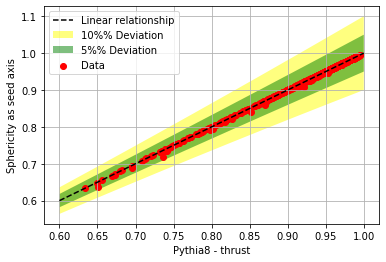

In [15]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, sph, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('Sphericity as seed axis')
ax.legend(loc='upper left')

plt.savefig('plots/sph1k.png')
plt.show()

In [16]:
for i in range(len(dw2)):
    if (dw2[i] > thr[i]):
        dw2[i] =  thr[i]

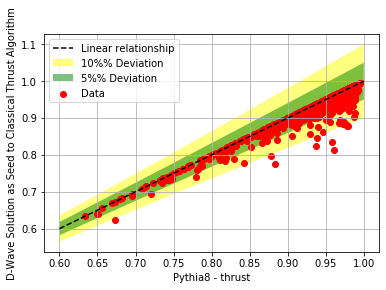

In [17]:
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, dw2, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('D-Wave Solution as Seed to Classical Thrust Algorithm')
ax.legend(loc='upper left')

plt.savefig('plots/DWaveSeed.png')
plt.show()

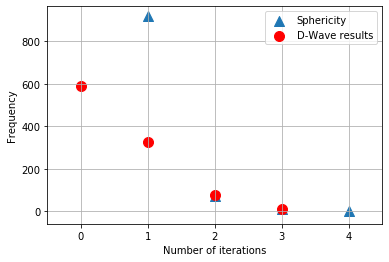

In [30]:
pat4 = re.compile(r"\s+")
f4 = open("/home/andrea/pythiaEvents/DWaveSeedResults_iter.dat", 'r')

g4 = list(zip(*[ pat4.sub(" ",x.strip()).split() for x in f4]))

niterd = np.array([ int(x) for x in g4[0]])


#counts, bins = np.histogram(niter, range(0,6), density=True)
#plt.hist(bins[:-1], bins, weights=counts)
#plt.scatter(bins[:-1], bins, weights=counts)

x,y = np.unique(niter, return_counts=True)
plt.scatter(x,y, s = 100, marker = "^", label = 'Sphericity')
x2,y2 = np.unique(niterd, return_counts=True)
plt.scatter(x2,y2, s = 100, label = 'D-Wave results', facecolor = 'red')

#plt.grid(axis='y', alpha=0.75)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xticks(np.arange(0,6, step=1.0))
plt.xlim(-0.50,4.5)
plt.savefig('plots/niter.png')

In [29]:
for n in range(len(niter)):
    if(niter[n] > 1 ): print(n, niter[n])
print("DWave seed results:")
for n in range(len(niterd)):
    if(niterd[n] > 1): print(n, niterd[n])

2 3
27 2
31 2
36 2
38 2
71 3
86 2
97 2
108 4
112 2
113 2
114 2
117 2
120 2
127 3
128 2
135 2
143 2
151 2
200 2
214 2
228 2
236 2
238 2
244 3
245 2
247 2
256 2
270 3
280 2
315 2
341 2
342 2
360 2
368 2
397 2
402 2
441 2
446 2
467 2
473 2
474 2
499 2
502 2
503 2
517 2
520 2
521 2
522 2
545 2
577 2
581 2
590 2
593 2
604 2
606 2
612 2
633 2
639 2
644 4
679 2
691 2
693 2
722 2
785 2
786 3
788 3
799 2
814 3
827 2
841 2
843 2
852 2
915 2
917 2
918 2
922 3
925 2
954 2
967 2
973 2
979 2
996 2
DWave seed results:
2 2
28 2
36 2
44 2
49 2
91 2
108 3
112 3
113 2
117 2
118 2
127 2
128 2
135 2
151 2
163 2
177 2
190 2
191 2
201 2
219 2
225 2
243 2
245 2
247 2
259 2
268 2
270 3
276 2
303 2
326 2
336 2
342 2
360 2
361 2
365 2
375 2
382 2
402 3
408 2
419 2
429 3
467 2
491 2
499 2
502 2
503 2
504 2
522 2
545 2
548 2
563 2
604 3
612 2
627 2
639 2
660 2
686 2
702 2
710 2
716 2
720 2
736 2
753 2
758 2
773 2
775 2
786 2
787 2
788 3
818 2
836 2
850 2
866 2
896 2
902 3
909 2
915 2
916 2
918 2
919 2
921 3
922 2


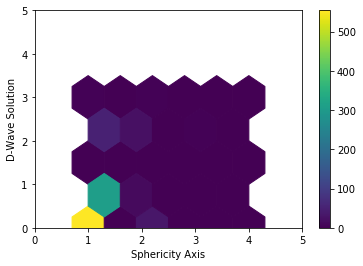

In [19]:
#from matplotlib.mlab import griddata
for i in range(len(rev)):
    if (rev[i] > thr[i]):
        rev[i] =  thr[i]

fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

#ax.grid()
xmin = 0.0#niter.min()
xmax = 5.0#niter.max()
ymin = 0.0#niterd.min()
ymax = 5.0#niterd.max()
z = [0,100,200,300,400,500,600,700,800,900]

#ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
#ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
#ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
#ax.scatter(niter, niterd, color='red')
#plt.plot(x_data, lower_bound, color='black',ls='--')

hb = ax.hexbin(niter, niterd, gridsize=5)
ax.axis([xmin, xmax, ymin, ymax])
ax.set_xlabel('Sphericity Axis')
ax.set_ylabel('D-Wave Solution')

cb = fig.colorbar(hb, ax=ax)
#ax.legend(loc='upper left')

#plt.savefig('plots/DWaveSeed.png')
plt.show()

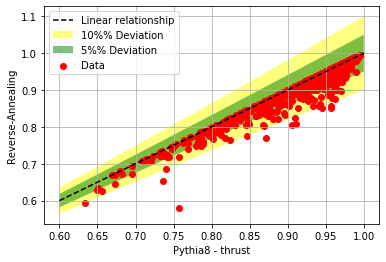

In [20]:
for i in range(len(rev)):
    if (rev[i] > thr[i]):
        rev[i] =  thr[i]
        
fig, ax = plt.subplots()
x_data = np.linspace(0.6, 1.0, 10)

a = list(zip(x_data, x_data))
sigma = 0.1

lower_bound = []
upper_bound = []
lower_bound5 = []
upper_bound5 = []

for i in range(len(x_data)):
    lower_bound.append(x_data[i]*(1-sigma*x_data[i]))
    upper_bound.append(x_data[i]*(1+sigma*x_data[i]))
    lower_bound5.append(x_data[i]*(1-0.05*x_data[i]))
    upper_bound5.append(x_data[i]*(1+0.05*x_data[i]))

ax.grid()
ax.fill_between(x_data, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,label='10%% Deviation')
ax.fill_between(x_data, lower_bound5, upper_bound5, facecolor='green', alpha=0.5,label='5%% Deviation')
ax.plot(x_data,x_data, color='black', ls='--', label='Linear relationship')
ax.scatter(thr, rev, color='red', label='Data')
#plt.plot(x_data, lower_bound, color='black',ls='--')
ax.set_xlabel('Pythia8 - thrust')
ax.set_ylabel('Reverse-Annealing')
ax.legend(loc='upper left')

plt.savefig('plots/revan.png')
plt.show()